
# 朴素贝叶斯（Naive Bayes）

朴素贝叶斯是一种基于**贝叶斯定理**与**特征条件独立性假设**的分类方法。尽管其“朴素”的假设（即特征之间相互独立）在现实世界中往往难以完全满足，但它在许多实际应用中表现出色，尤其是在文本分类、垃圾邮件过滤和推荐系统等领域，以其简单高效、易于实现而著称。

`核心原理：贝叶斯定理`

朴素贝叶斯分类器的基石是贝叶斯定理。在分类问题中，我们的目标是给定一个特征向量 $X = (X_1, X_2, \ldots, X_n)$，判断它属于哪个类别 $Y_k$。根据贝叶斯定理，类别 $Y_k$ 的后验概率 $P(Y_k|X)$ 可以表示为：

$$P(Y_k|X) = \frac{P(X|Y_k)P(Y_k)}{P(X)}$$

其中：
* $P(Y_k|X)$ 是**后验概率**：在已知特征 $X$ 的情况下，样本属于类别 $Y_k$ 的概率。这是我们最终希望得到的结果。
* $P(X|Y_k)$ 是**似然**：在类别 $Y_k$ 已经确定的情况下，出现特征 $X$ 的概率。
* $P(Y_k)$ 是**先验概率**：在没有任何特征信息的情况下，样本属于类别 $Y_k$ 的概率。可以通过训练集中各类别样本的比例估算。
* $P(X)$ 是**证据**：特征向量 $X$ 出现的概率。对于所有的类别，这个值都是相同的，因此在比较不同类别的后验概率时，可以忽略分母 $P(X)$。

因此，我们只需要比较 $P(X|Y_k)P(Y_k)$ 的大小来决定分类：

$$Y_{预测} = \underset{k}{\operatorname{argmax}} \, P(Y_k|X) = \underset{k}{\operatorname{argmax}} \, P(X|Y_k)P(Y_k)$$

`“朴素”的假设：特征条件独立性`

朴素贝叶斯之所以被称为“朴素”，是因为它作出了一个**强假设**：给定类别 $Y_k$ 的情况下，所有的特征 $X_1, X_2, \ldots, X_n$ 之间是相互独立的。这意味着它们之间没有关联性。基于这个假设，似然 $P(X|Y_k)$ 可以被分解为所有单个特征条件概率的乘积：

$$P(X|Y_k) = P(X_1, X_2, \ldots, X_n|Y_k) = P(X_1|Y_k)P(X_2|Y_k)\ldots P(X_n|Y_k) = \prod_{i=1}^{n} P(X_i|Y_k)$$

将这个独立性假设代入贝叶斯分类公式，我们得到朴素贝叶斯分类器的最终形式：

$$Y_{预测} = \underset{k}{\operatorname{argmax}} \, P(Y_k) \prod_{i=1}^{n} P(X_i|Y_k)$$

`参数估计`

在训练阶段，朴素贝叶斯模型需要估计两类参数：
1.  **先验概率 $P(Y_k)$**：
    通常通过训练集中属于类别 $Y_k$ 的样本数占总样本数的比例来估计。
    $$P(Y_k) = \frac{\text{属于类别 } Y_k \text{ 的样本数}}{\text{总样本数}}$$
2.  **条件概率 $P(X_i|Y_k)$**：
    这取决于特征 $X_i$ 的类型（离散型或连续型），以及所选择的朴素贝叶斯模型。

`1. 离散型特征（如文本中的词频）`

对于离散型特征，条件概率通常通过**频率计数**来估计：

$$P(X_i=x_{ij}|Y_k) = \frac{\text{在类别 } Y_k \text{ 中，特征 } X_i \text{ 取值为 } x_{ij} \text{ 的样本数}}{\text{类别 } Y_k \text{ 的总样本数}}$$

为了解决**“零频率问题”**（即如果某个特征值在训练集中从未与某个类别一同出现，会导致其条件概率为零，进而使整个乘积为零，影响分类），通常会采用**拉普拉斯平滑（Laplace Smoothing）**。拉普拉斯平滑会在分子和分母上都加上一个小的常数 $\alpha$（通常 $\alpha=1$）：

$$P(X_i=x_{ij}|Y_k) = \frac{\text{在类别 } Y_k \text{ 中，特征 } X_i \text{ 取值为 } x_{ij} \text{ 的样本数} + \alpha}{\text{类别 } Y_k \text{ 的总样本数} + \alpha \times \text{特征 } X_i \text{ 可能取值的总数}}$$

`2. 连续型特征`

对于连续型特征，通常假设特征服从某种概率分布，并通过训练数据估计该分布的参数。最常见的是假设特征服从**高斯（正态）分布**，这也是**高斯朴素贝叶斯（Gaussian Naive Bayes）**的核心：

$$P(X_i|Y_k) = \frac{1}{\sqrt{2\pi\sigma_{ki}^2}} \exp\left(-\frac{(X_i - \mu_{ki})^2}{2\sigma_{ki}^2}\right)$$

其中，$\mu_{ki}$ 和 $\sigma_{ki}^2$ 分别是在类别 $Y_k$ 下，特征 $X_i$ 的均值和方差，它们可以从训练数据中估计得到。

`朴素贝叶斯的不同模型`

根据特征类型的不同，朴素贝叶斯有几种常见的变体：
1.  **高斯朴素贝叶斯（Gaussian Naive Bayes）：**
    * **适用场景：** 特征是**连续型数据**，并且假设这些特征在每个类别下服从高斯（正态）分布。
    * **计算方式：** 利用高斯分布的概率密度函数来计算 $P(X_i|Y_k)$。
2.  **多项式朴素贝叶斯（Multinomial Naive Bayes）：**
    * **适用场景：** 常用于**文本分类**，特征是离散的**计数**（例如单词在文档中出现的频率，即“词袋”模型）。
    * **计算方式：** 基于多项式分布，计算特定词汇在某个类别文档中出现的概率。
3.  **伯努利朴素贝叶斯（Bernoulli Naive Bayes）：**
    * **适用场景：** 适用于**二值特征**（即特征只有“出现”或“不出现”两种状态，例如某个词是否在文档中出现过，而不关心出现次数）。
    * **计算方式：** 基于伯努利分布，计算特征在给定类别下出现的概率。

`优点和缺点`

**优点：**
* **简单高效：** 算法思想简单，易于理解和实现，计算开销小。
* **训练速度快：** 由于参数估计是基于频率统计，训练过程非常迅速，尤其适用于大规模数据集。
* **对缺失数据不敏感：** 在某些情况下，即使存在部分缺失数据也能进行分类（但实际应用中通常需要进行数据预处理）。
* **对高维数据表现良好：** 在处理特征维度很高的数据集（如文本数据）时仍然有效。
* **适用于多分类问题：** 可以直接用于多分类任务，无需像某些二分类器那样进行多次扩展。

**缺点：**
* **“朴素”假设限制：** 强特征独立性假设在现实中往往不成立，这可能导致分类精度受限。尽管如此，在许多实际应用中，即使独立性假设不完全满足，朴素贝叶斯依然表现出良好的性能，因为它通常关注的是概率排序，而不是精确的概率值。
* **“零频率”问题：** 如果训练集中某个特征值没有与某个类别一同出现，会导致其条件概率为零，进而影响整个分类结果。拉普拉斯平滑是解决此问题的常用方法。
* **对输入数据敏感：** 如果输入数据的数据类型或分布与模型假设不符，可能会导致性能下降。

`应用场景`

朴素贝叶斯在以下领域有广泛应用：
* **文本分类：** 如新闻文章分类、电影评论情感分析、邮件主题分类等。
* **垃圾邮件过滤：** 判断邮件是否为垃圾邮件的经典应用。
* **疾病诊断：** 根据患者的症状来预测其患有某种疾病的概率。
* **推荐系统：** 根据用户的历史行为和偏好进行商品或内容推荐。
* **自然语言处理：** 在许多NLP任务中作为基线模型使用。



| 类                     | 含义                                     |
| :--------------------- | :--------------------------------------- |
| `naive_bayes.BernoulliNB` | 伯努利分布下的朴素贝叶斯               |
| `naive_bayes.GaussianNB`  | 高斯分布下的朴素贝叶斯                 |
| `naive_bayes.MultinomialNB` | 多项式分布下的朴素贝叶斯               |
| `naive_bayes.ComplementNB`| 补充朴素贝叶斯                         |
| `linear_model.BayesianRidge` | 贝叶斯岭回归，在参数估计过程中使用贝叶斯回归技术来包括正则化参数 |

## GaussianNB()

In [20]:
# GaussianNB
# 没有太多参数可以调节，因此如果效果不理想，我们一般就会更换模型

In [1]:
%load_ext watermark

In [2]:
%watermark -d -v -m -p numpy,pandas,scikit-learn,matplotlib 

Python implementation: CPython
Python version       : 3.10.18
IPython version      : 8.37.0

numpy       : 1.24.3
pandas      : 2.2.3
scikit-learn: 1.7.0
matplotlib  : 3.10.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as CM, brier_score_loss, log_loss
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
digits = load_digits()
x, y = digits.data, digits.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=888)
xtrain

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ..., 16., 15.,  2.],
       [ 0.,  2., 13., ..., 12.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 16., 13.,  0.],
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
xtrain.shape # 64个特征

(1257, 64)

In [25]:
np.unique(ytrain) # 10类标签

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
gnb = GaussianNB().fit(xtrain, ytrain)
gnb.score(xtest, ytest)

0.8648148148148148

In [27]:
y_pred = gnb.predict(xtest)
y_pred, y_pred.shape

(array([2, 7, 0, 5, 6, 8, 6, 7, 6, 6, 9, 7, 4, 5, 5, 3, 9, 2, 1, 7, 7, 5,
        8, 3, 7, 0, 4, 7, 1, 1, 1, 5, 0, 8, 9, 7, 6, 7, 9, 3, 7, 5, 8, 5,
        7, 6, 1, 8, 2, 5, 9, 0, 3, 0, 2, 8, 0, 0, 7, 4, 7, 2, 5, 9, 1, 8,
        5, 3, 3, 6, 3, 4, 6, 0, 6, 0, 3, 8, 8, 8, 7, 8, 3, 4, 5, 4, 0, 6,
        4, 2, 2, 5, 5, 6, 8, 2, 1, 5, 0, 8, 6, 3, 5, 8, 8, 6, 9, 1, 6, 2,
        1, 4, 2, 7, 3, 0, 7, 3, 2, 6, 1, 4, 7, 5, 8, 6, 1, 1, 8, 2, 4, 3,
        2, 6, 1, 2, 1, 1, 5, 5, 3, 4, 8, 8, 8, 8, 5, 8, 1, 8, 0, 6, 1, 7,
        2, 7, 7, 3, 1, 1, 3, 1, 0, 0, 8, 7, 3, 1, 9, 2, 1, 9, 7, 3, 8, 7,
        7, 8, 5, 9, 5, 6, 7, 9, 0, 1, 5, 8, 7, 7, 7, 5, 3, 5, 6, 4, 3, 0,
        5, 6, 5, 3, 1, 8, 3, 5, 9, 7, 1, 2, 8, 7, 1, 3, 3, 3, 7, 0, 0, 5,
        4, 4, 3, 0, 1, 6, 6, 7, 8, 4, 2, 8, 0, 5, 0, 9, 6, 8, 1, 5, 7, 0,
        0, 1, 8, 9, 4, 4, 2, 3, 6, 0, 3, 4, 8, 6, 7, 3, 0, 4, 6, 5, 2, 6,
        8, 2, 3, 7, 3, 7, 4, 9, 5, 2, 3, 6, 7, 8, 6, 0, 3, 1, 5, 1, 2, 7,
        3, 8, 3, 3, 9, 8, 9, 5, 5, 5, 

In [28]:
prob = gnb.predict_proba(xtest)
prob.shape # 每一列对应的一个标签类别下的概率

(540, 10)

In [29]:
prob.sum(axis = 1) # 每一行概率之和都是1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [30]:
cm = CM(ytest, y_pred)
# ROC不能用于多分类
# 多分类情况下最佳的模型评估指标是混淆矩阵和整体的准确度


<Axes: >

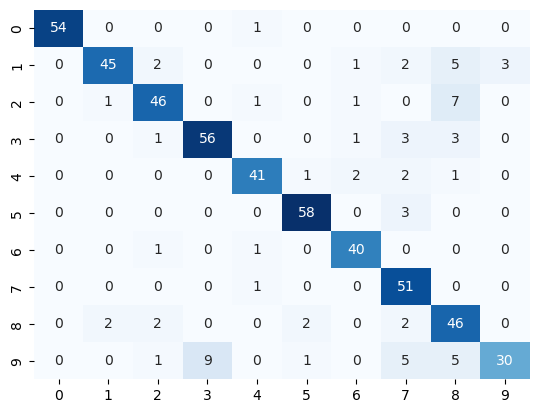

In [31]:
class_labels = np.unique(ytrain)
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

### GaussianNB擅长的数据集

In [32]:
from sklearn.datasets import make_moons, make_blobs, make_circles, make_classification

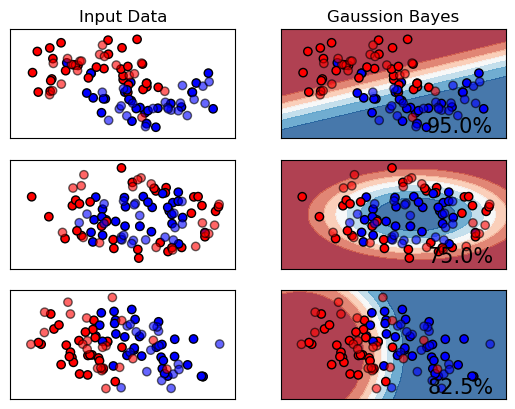

In [33]:
h = 0.02

names = ['Muitinomial', 'Gaussian', "Bernulli", 'Complement']
classifiers = ['MultinomialNB()', 'GaussianNB', 'BernoulliNB()', 'ComplementNB()']

x, y = make_classification(n_features=2, n_redundant = 0, n_informative=2, random_state=888, n_clusters_per_class=1)

rng = np.random.RandomState(2)
x += 2*rng.uniform(size = x.shape)
linearly_separable = (x, y)

datasets = [make_moons(noise=0.3, random_state=888)
            ,make_circles(noise=0.2, factor=0.5, random_state=888)
            , linearly_separable
            ]

figure = plt.figure()
i = 1

for ds_index, ds in enumerate(datasets):
    x, y = ds
    x = StandardScaler().fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=888)
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2)
                                 , np.arange(x2_min, x2_max, 0.2))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_index == 0:
        ax.set_title('Input Data')
    
    ax.scatter(x_train[:, 0], x_train[:, 1], c = y_train
               , cmap = cm_bright, edgecolors='k')
    ax.scatter(x_test[:, 0], x_test[:, 1], c = y_test
               , cmap=cm_bright, alpha = 0.6, edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks([])
    ax.set_yticks([])
    i+=1
    ax = plt.subplot(len(datasets), 2, i)

    clf = GaussianNB().fit(x_train, y_train)
    score = clf.score(x_test, y_test)

    z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:, 1]
    z = z.reshape(array1.shape)
    ax.contourf(array1, array2, z, cmap = cm, alpha = 0.8)
    ax.scatter(x_train[:, 0], x_train[:, 1], c = y_train
               , cmap = cm_bright, edgecolors='k')
    ax.scatter(x_test[:, 0], x_test[:, 1], c = y_test
               , cmap=cm_bright, alpha = 0.6, edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks([])
    ax.set_yticks([])

    if ds_index == 0:
        ax.set_title('Gaussion Bayes')

    ax.text(array1.max() - 0.3, array2.min() + 0.3, ('{:.1f}%'.format(score*100)),
            size = 15, horizontalalignment = 'right')
    i+=1

plt.show()



从图上来看，高斯贝叶斯属于比较特殊的一类分类器，其分类效果在二分数据和月亮型数据上表现优秀，但是环形数据不太擅长。我们之前学过的模型中，许多线性模型比如逻辑回归，线性SVM等等，在线性数据集上会绘制直线决策边界，因此难以对月亮型和环形数据进行区分，但高斯朴素贝叶斯的决策边界是曲线，可以是环形也可以是弧线，所以尽管贝叶斯本身更加擅长线性可分的二分数据，但朴素贝叶斯在环形数据和月亮型数据上也可以有远远
胜过其他线性模型的表现。

### GaussianNB的拟合效果与运算速度

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, ShuffleSplit
import datetime
from time import time

In [35]:
def plot_learning_curve(estimator, title, x, y
                        , ax # 选择子图
                        , ylim = None # 设置纵坐标取值范围
                        , cv = None # 交叉验证
                        , n_jobs = None # 设定要使用的线程
                        ):
    train_sizes , train_scores, test_scores = learning_curve(estimator, x, y, cv = cv, n_jobs = n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)

    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , label = 'Training score')
    ax.plot(train_sizes, np.mean(test_scores, axis = 1), 'o-'
            , label = 'Test score')
    ax.legend()
    return ax


In [36]:
digits = load_digits()
x, y = digits.data, digits.target

title = ['Naive Bayes', 'Decision Tree', 'SVM RBF kernel'
         , 'RandomForest', 'LogisticsRegression']
model = [GaussianNB(), DecisionTreeClassifier()
         , SVC(gamma=0.001)
         , RandomForestClassifier(n_estimators=50)
         , LogisticRegression(C=0.1, solver='lbfgs')
         ]
cv= ShuffleSplit(n_splits=50, test_size=0.2, random_state=88)


Naive Bayes:00:01:475542
Decision Tree:00:02:085835
SVM RBF kernel:00:27:018532
RandomForest:00:26:519421
LogisticsRegression:00:17:129582


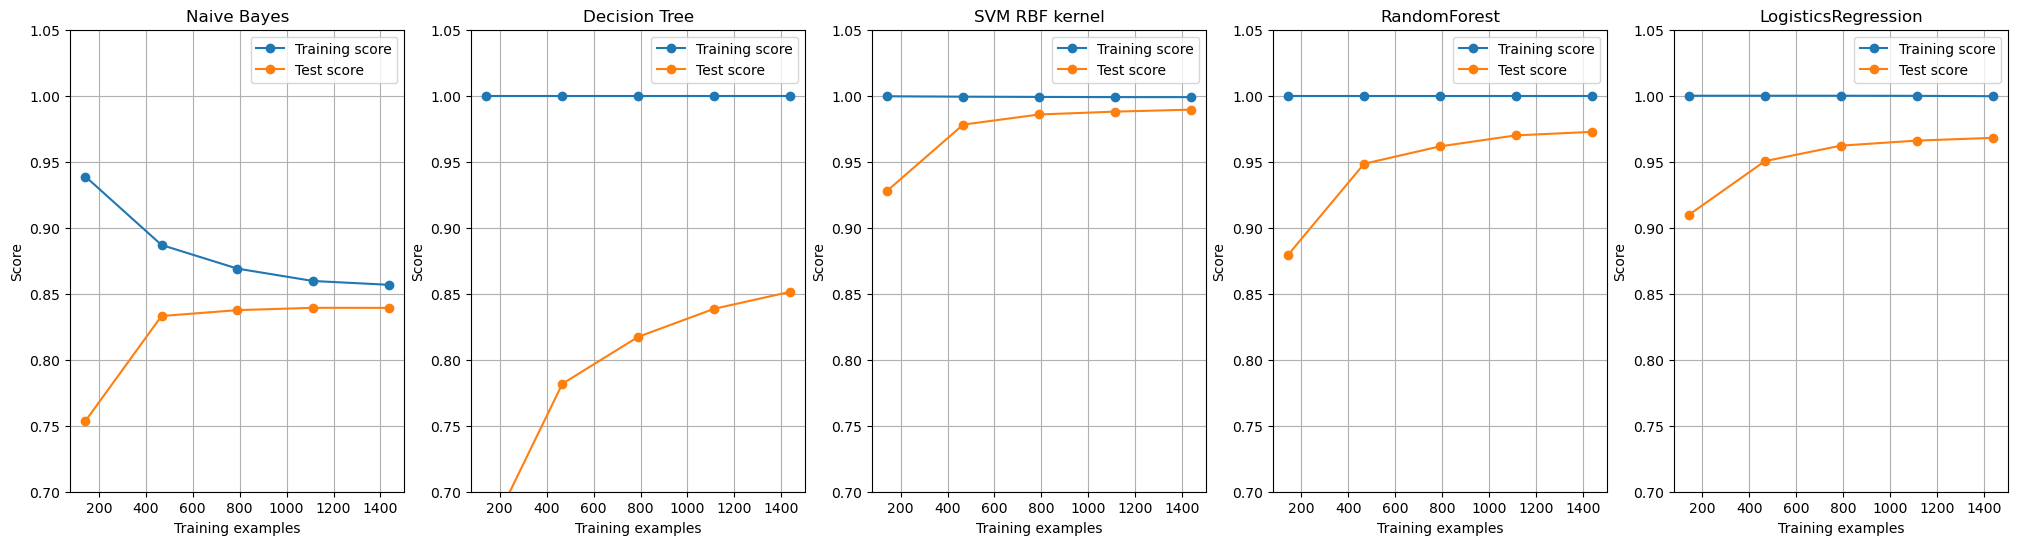

In [ ]:
fig, axes = plt.subplots(1, 5, figsize = (25, 6))
for ind, title_, estimator in zip(range(len(title)), title, model):
    time0 = time()
    plot_learning_curve(estimator, title_, x, y
                        , ax = axes[ind]
                        , ylim = [0.7, 1.05]
                        , cv = cv
                        , n_jobs=4)
    print('{}:{}'.format(title_, datetime.datetime.fromtimestamp(time() - time0).strftime('%M:%S:%f')))

plt.show()

# 对于后三种方法，样本量逐渐增多，过拟合现象逐渐消失
# 决策树是天生过拟合的模型
# 贝叶斯的过拟合问题解决是因为训练集的表现下降

## MultinomialNB()

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_blobs

class_1 = 500
class_2 = 500  # 两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]]  # 设定两个类别的中心
clusters_std = [0.5, 0.5]  # 设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y,
                                                test_size=0.3
                                                , random_state=420)

In [79]:
# 归一化，防止特征矩阵里有负值
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(Xtrain)
xtrain = mms.transform(Xtrain)
xtest = mms.transform(Xtest)

In [83]:
mnb = MultinomialNB().fit(xtrain, Ytrain)
# 调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
# 由于概率[0, 1]，因此对数先验概率是负值
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [85]:
np.exp(mnb.class_log_prior_)

array([0.50142857, 0.49857143])

In [86]:
(Ytrain == 1).sum()/Ytrain.shape[0]

0.49857142857142855

In [87]:
# 返回一个固定标签类别下的每个特征的对数概率log(P(x_i|y))
mnb.feature_log_prob_

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [88]:
# 在fit时每个标签类别下包含的样本数
mnb.class_count_

array([351., 349.])

In [89]:
mnb.predict(xtest)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
mnb.predict_proba(xtest)
# 每个样本在每个标签取值下的概率

array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [91]:
mnb.score(xtest, Ytest)

0.5433333333333333

In [92]:
brier_score_loss(Ytest, mnb.predict_proba(xtest)[:, 1], pos_label=1)

0.24977828412546027

In [93]:
# 以上看出来效果不是很好
# 尝试将xtrain转换成分类型数据
# 注意xtrain没有经过归一化，因为做哑变量之后所有的数据就不会有负数了
from sklearn.preprocessing import KBinsDiscretizer
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(xtrain)

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [94]:
xtrain_ = kbs.transform(xtrain)
xtest_ = kbs.transform(xtest)

In [ ]:
xtrain_.shape #2个特征中，每个特征分了10个箱所分出来的哑变量

(700, 20)

In [95]:
mnb = MultinomialNB().fit(xtrain_, Ytrain)
mnb.score(xtest_, Ytest)

0.9966666666666667

In [96]:
brier_score_loss(Ytest, mnb.predict_proba(xtest_)[:, 1], pos_label=1)

0.0014593932778211864

## BernoulliNB()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
# 归一化
mms = MinMaxScaler().fit(Xtrain)
xtrain = mms.transform(Xtrain)
xtest = mms.transform(Xtest)
# 假如不设置二值化
bnl = BernoulliNB().fit(xtrain, Ytrain)
bnl.score(xtest, Ytest), brier_score_loss(Ytest, bnl.predict_proba(xtest)[:, 1], pos_label=1)

(0.49666666666666665, 0.25000009482193225)

In [ ]:
# 二值化
# 归一化之后设置一个阈值0.5
bnl = BernoulliNB(binarize=0.5).fit(xtrain, Ytrain)
bnl.score(xtest, Ytest), brier_score_loss(Ytest, bnl.predict_proba(xtest)[:, 1], pos_label=1)

(0.9833333333333333, 0.010405875827339534)

## 样本不均衡问题

In [120]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss, recall_score, roc_auc_score

In [113]:
class_1 = 50000
class_2 = 500
centers = [[0.0, 0.0], [5.0, 5.0]]
clusters_std = [3, 1]
x, y = make_blobs(n_samples=[class_1, class_2]
                  , centers=centers
                  , cluster_std=clusters_std
                  , random_state=888
                  , shuffle=False)
x.shape, np.unique(y)

((50500, 2), array([0, 1]))

In [122]:
name = ['Multinomial', 'Gaussian', 'Bernoulli']
models = [MultinomialNB(), GaussianNB(), BernoulliNB()]

for name, clf in zip(name, models):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=888)
    
    # 多项式要求分类
    # 伯努利要求二分类
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins = 10, encode = 'onehot').fit(xtrain)
        xtrain = kbs.transform(xtrain)
        xtest = kbs.transform(xtest)

    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    prob = clf.predict_proba(xtest)[:, 1]
    score = clf.score(xtest, ytest)
    print(name)
    print('\tBirer:{:.5f}'.format(brier_score_loss(ytest, prob, pos_label=1)))
    print('\tAccuracy:{:.5f}'.format(score))
    print('\tRecall:{:.5f}'.format(recall_score(ytest, y_pred)))
    print('\tAUC:{:.5f}'.format(roc_auc_score(ytest, prob)))
 


d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


Multinomial
	Birer:0.00628
	Accuracy:0.99056
	Recall:0.00000
	AUC:0.99052
Gaussian
	Birer:0.00551
	Accuracy:0.99261
	Recall:0.48951
	AUC:0.99390
Bernoulli
	Birer:0.00848
	Accuracy:0.98818
	Recall:0.72727
	AUC:0.99038


从结果上来看，多项式朴素贝叶斯判断出了所有的多数类样本，但放弃了全部的少数类样，收到样本不均衡影响最严重。高斯比多项式在少数类的判断上更加成功一些，至少得到了49%的recall。伯努利贝叶斯虽然整体的准确度和布里尔分数不如多项式和高斯朴素贝叶斯和，但至少成功捕捉出了73%的少数类。可见，伯努利贝叶斯最能够忍受样本不均衡问题。

可是，伯努利贝叶斯只能用于处理二项分布数据，在现实中，强行将所有的数据都二值化不会永远得到好结果，在我们有多个特征的时候，我们更需要一个个去判断究竟二值化的阈值该取多少才能够让算法的效果优秀。这样做无疑是非常低效的。那如果我们的目标是捕捉少数类，我们应该怎么办呢?高斯朴素贝叶斯的效果虽然比多项式好但是也没有好到可以用来帮助我们捕捉少数类的程度--49%，还不如抛硬币的结果。因此，孜孜不倦的统计学家们改进了多项式朴素贝叶斯，改进了多项式朴素贝叶斯的多项缺点，包括在处理样本不平衡问题时的表现。

## CompletmentNB()

In [124]:
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime

In [125]:
name = ['Multinomial', 'Gaussian', 'Bernoulli', 'Complement']
models = [MultinomialNB(), GaussianNB(), BernoulliNB(), ComplementNB()]

for name, clf in zip(name, models):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=888)
    time0 = time()
    # 多项式要求分类
    # 伯努利要求二分类
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins = 10, encode = 'onehot').fit(xtrain)
        xtrain = kbs.transform(xtrain)
        xtest = kbs.transform(xtest)

    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    prob = clf.predict_proba(xtest)[:, 1]
    score = clf.score(xtest, ytest)
    print(name)
    print('\tBirer:{:.5f}'.format(brier_score_loss(ytest, prob, pos_label=1)))
    print('\tAccuracy:{:.5f}'.format(score))
    print('\tRecall:{:.5f}'.format(recall_score(ytest, y_pred)))
    print('\tAUC:{:.5f}'.format(roc_auc_score(ytest, prob)))
    print(datetime.datetime.fromtimestamp(time() - time0).strftime('%M:%S:%f'))
 


Multinomial
	Birer:0.00628
	Accuracy:0.99056
	Recall:0.00000
	AUC:0.99052
00:00:048180
Gaussian
	Birer:0.00551
	Accuracy:0.99261
	Recall:0.48951
	AUC:0.99390
00:00:031200
Bernoulli
	Birer:0.00848
	Accuracy:0.98818
	Recall:0.72727
	AUC:0.99038
00:00:048678
Complement
	Birer:0.04176
	Accuracy:0.94297
	Recall:1.00000
	AUC:0.99052
00:00:046036


d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be ch

可以发现，补集朴素贝叶斯牺牲了部分整体的精确度和布里尔指数，但是得到了十分高的Recall，捕捉了100%的少数类，并且在此基础上维持了和原本的多项式朴素贝叶斯一致的AUC分数。和其他的贝叶斯算法比起来，我补集朴素贝叶斯的运行速度也十分优秀。如果我们的目标是捕捉少数类，那我们毫无疑问会希望选择补集朴素贝叶斯作为我们的算法。

# 概率类模型的评估指标

 一、评估概率值本身的质量（校准度和准确度）

1.  **对数损失（Log Loss / Logistic Loss / Cross-Entropy Loss）**
    * **含义：** 惩罚预测概率与真实标签之间的差异，`值越小越好`。对高置信度的错误预测惩罚严重。
    * **公式：**
        对于二分类问题：
        $$L = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]$$
        其中：
        * $N$ 是样本总数。
        * $y_i$ 是第 $i$ 个样本的真实标签（$0$ 或 $1$）。
        * $p_i$ 是模型预测第 $i$ 个样本属于正类（$y_i=1$）的概率。
    * **Scikit-learn 函数：** `sklearn.metrics.log_loss(y_true, y_pred_proba)`

2.  **Brier 分数（Brier Score）**
    * **含义：** 衡量预测概率与真实标签（0或1）的均方误差，`值越小越好`。
    * **公式：**
        对于二分类问题：
        $$BS = \frac{1}{N} \sum_{i=1}^{N} (p_i - y_i)^2$$
        其中：
        * $N$ 是样本总数。
        * $y_i$ 是第 $i$ 个样本的真实标签（$0$ 或 $1$）。
        * $p_i$ 是模型预测第 $i$ 个样本属于正类（$y_i=1$）的概率。
    * **Scikit-learn 函数：** `sklearn.metrics.brier_score_loss(y_true, y_pred_proba)`

3.  **可靠性图/校准曲线（Reliability Diagram / Calibration Curve）**
    * **含义：** 可视化工具，比较预测概率区间内的平均预测概率与实际正例比例，用于评估模型校准度。`越靠近对角线越好`
    * **公式：** 无单一公式，通过绘制 (Average Predicted Probability in Bin, Fraction of Positives in Bin) 点来生成曲线。
    * **Scikit-learn 函数：** `sklearn.calibration.calibration_curve(y_true, y_pred_proba, n_bins=10)`


### Brier Score

In [65]:
from sklearn.metrics import brier_score_loss

x, y = load_digits().data, load_digits().target

# x, y = make_classification(n_features=2, n_redundant = 0, n_informative=2, random_state=888, n_clusters_per_class=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=888)
y_pred = GaussianNB().fit(xtrain, ytrain).predict(xtest)
prob = GaussianNB().fit(xtrain, ytrain).predict_proba(xtest)
#注意，第一个参数是真实标签，第二个参数是预测出的概率值
#在二分类情况下，接口predict_proba会返回两列，但SVC的接口decision_function却只返回一列
#要随时注意，使用了怎样的概率分类器，以辨别查找置信度的接口，以及这些接口的结构
y_true_binary = (ytest == 1).astype(int)
y_true_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
brier_score_loss(y_true_binary, prob[:,1], pos_label=1)

0.02784770142402559

In [67]:
logis = LogisticRegression(C=1, solver='lbfgs', max_iter=3000, multi_class='auto').fit(xtrain, ytrain)
svc = SVC(kernel='linear', gamma=1).fit(xtrain, ytrain)

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [68]:
brier_score_loss((ytest == 1).astype(int), logis.predict_proba(xtest)[:, 1], pos_label=1)

0.008633440040713645

In [69]:
# 由于SVC的置信度不是概率，为了可比性，我们需要将SVC的置信度“距离”归一化，压缩到[0, 1]
svc_prob = (svc.decision_function(xtest) - svc.decision_function(xtest).min())/(svc.decision_function(xtest).max() - svc.decision_function(xtest).min())
svc_prob.sum(axis = 1)

array([4.94363538, 4.99846224, 5.01176991, 4.90274245, 4.93430292,
       4.88863562, 4.96012734, 4.97966993, 4.94452445, 4.96537418,
       4.91915497, 5.00649275, 4.97301904, 4.93448226, 5.02502658,
       4.98528684, 4.94980505, 4.98908463, 4.94981723, 5.05539269,
       4.94659   , 4.91894809, 4.88677222, 5.00286801, 5.00374042,
       5.03541138, 4.96740834, 4.98455955, 4.93951064, 4.89993681,
       5.00109583, 4.96031946, 5.02335641, 4.98413237, 4.94761643,
       5.01337871, 4.94927446, 5.00206516, 4.98547906, 4.99685456,
       4.97979104, 4.9497384 , 4.91794193, 4.94473593, 5.00553667,
       4.98542645, 4.96798367, 4.95573706, 4.94423345, 4.99008758,
       4.89143661, 4.9617404 , 5.04471087, 4.98231488, 4.99655007,
       4.94195853, 4.98683088, 4.93286106, 5.01139147, 5.04641347,
       5.01135686, 4.96196719, 4.94046021, 4.97094841, 4.99256776,
       4.91053081, 4.96647643, 4.93668606, 5.01044946, 4.98782097,
       4.95705711, 4.99315353, 4.9509324 , 4.99118808, 4.94659

In [70]:
brier_score_loss((ytest == 1).astype(int), svc_prob[:, 1], pos_label=1)

0.23826230773365462

In [74]:
# 通过这个Brier分数，看出来SVM居然效果是最差的
name  = ['Bayes', 'Logistic', 'SVC']


df = pd.DataFrame(index=range(10), columns=name)
for i in range(10):
    df.loc[i, name[0]] = brier_score_loss((ytest == i).astype(int), prob[:, i], pos_label=1)
    df.loc[i, name[1]] = brier_score_loss((ytest == i).astype(int), logis.predict_proba(xtest)[:, i], pos_label=1)
    df.loc[i, name[2]] = brier_score_loss((ytest == i).astype(int), svcp_prob[:, i], pos_label=1)
df

Bayes  Logistic       SVC
0   0.00195  0.001449  0.002051
1  0.027848  0.008633  0.007283
2  0.029451  0.001096  0.002132
3  0.029469  0.008464  0.006575
4  0.016228  0.001313  0.001189
5  0.011209  0.008529  0.004355
6  0.011678  0.001996  0.001959
7  0.032775  0.000822  0.002189
8  0.049467  0.011842   0.00955
9  0.041439  0.004391  0.005126

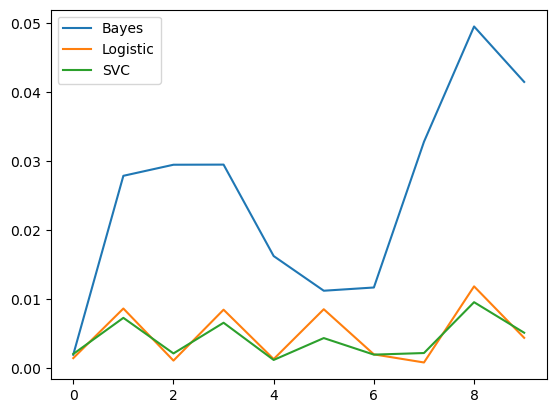

In [76]:

for i in range(3):
    plt.plot(range(10), df.iloc[:, i], label = name[i])

plt.legend()
plt.show()

# 逻辑回归的布里尔分数有压倒性的优势
# SVC是强行利用sigmoid函数来压缩概率，因此产出的概率不是那么可靠
# 贝叶斯是位于逻辑回归的SVC之间

### Log Loss

In [73]:
from sklearn.metrics import log_loss

# `虽然第二个参数是y_pred但是其实是y_prob`
log_loss(ytest, prob)


2.1690087008248016

In [74]:
log_loss(ytest, logis.predict_proba(xtest))

0.11748792569375716

In [73]:
svcp = SVC(kernel='linear', gamma=1, probability=True).fit(xtrain, ytrain)
svcp_prob = svcp.predict_proba(xtest)
log_loss(ytest, svcp_prob)

0.11462188075887136

In [80]:
log_loss(ytest, svc_prob)

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\metrics\_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


0.004501010298792651

因为逻辑回归和SVC都是以最优化为目的来求解模型，然后进行分类的算法。而朴素贝叶斯中，却没有最优化的过程。对数似然函数直接指向模型最优化的方向，甚至就是逻辑回归的损失函数本身，因此在逻辑回归和SVC上表现得更好。

### Brier VS LogLoss

那什么时候使用对数似然，什么时候使用布里尔分数?

在现实应用中，`对数似然函数`是`概率类模型评估`的黄金指标，往往是我们评估概率类模型的优先选择。但是它也有些缺点，首先它没有界，不像布里尔分数有上限，可以作为模型效果的参考。其次，它的解释性不如布里尔分数，很难与非技术人员去交流对数似然存在的可靠性和必要性。第三，它在以最优化为目标的模型上明显表现更好。而且，它还有一些数学上的问题，比如不能接受为0或1的概率，否则的话对数似然就会取到极限值(考虑以。为底的自然对数在取到0或1的时候的情况)。所以因此通常来说，我们有以下使用规则:

| 需求     | 优先使用对数似然                         | 优先使用布里尔分数                         |
| :------- | :--------------------------------------- | :----------------------------------------- |
| 衡量模型 | 要对比多个模型，或者衡量模型的不同变化 | 衡量单模型的表现                 |
| 可解释性 | 机器学习和深度学习之间的行家交流，学术论文 | 商业报告，老板开会，业务模型的衡量 |
| 优化指向 | 逻辑回归，SVC                  | 朴素贝叶斯                       |
| 数学问题 | 概率只能无限接近0或1，无法取到0或1 | 概率可以取到0或1，比如树，随机森林 |

回到我们的贝叶斯来看，如果贝叶斯的模型效果不如其他模型，而我们又不想更换模型，那怎么办呢?如果以精确度为指标来调整参数，贝叶斯估计是无法拯救了--不同于SVC和逻辑回归，贝叶斯的原理简单，根本没有什么可用的参数。但是产出概率的算法有自己的调节方式，就是调节概率的校准程度。校准程度越高，模型对概率的预测越准确，算法在做判断时就越有自信，模型就会更稳定。如果我们追求模型在概率预测上必须尽量贴近真实概率，那么我们就可以使用可靠性曲线来调节概率的校准程度。

### Reliability Curve

In [6]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=100000, n_features=20
                           , n_classes=2  # 标签为2类
                           , n_informative=2  # 两个代表较多信息
                           , n_redundant=10 # 10个冗余的特征
                           , random_state=888)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y
                                                , test_size=0.99
                                                , random_state=888)
# 样本量足够大，用0.01的样本做训练集，naiveNB在很少的训练集上表现也很好
xtrain.shape, xtest.shape, ytrain.shape

((1000, 20), (99000, 20), (1000,))

In [10]:
gnb = GaussianNB().fit(xtrain, ytrain)
ypred = gnb.predict(xtest)
prob = gnb.predict_proba(xtest)

In [11]:
prob

array([[9.99999860e-01, 1.39938782e-07],
       [5.15376126e-04, 9.99484624e-01],
       [1.56374512e-04, 9.99843625e-01],
       ...,
       [8.33124189e-01, 1.66875811e-01],
       [9.99998643e-01, 1.35699132e-06],
       [1.00000000e+00, 1.09860635e-11]])

In [29]:
df = pd.DataFrame({'ytrue':ytest[:500], 'probability':prob[:, 1][:500]})
df = df.sort_values(by = 'probability')
df.index = range(df.shape[0])
df

ytrue   probability
0        0  2.614389e-24
1        0  1.677477e-21
2        0  6.326565e-19
3        0  6.909452e-19
4        0  1.812648e-17
..     ...           ...
495      1  1.000000e+00
496      1  1.000000e+00
497      1  1.000000e+00
498      1  1.000000e+00
499      1  1.000000e+00

[500 rows x 2 columns]

In [27]:
clf_score = gnb.score(xtest, ytest)

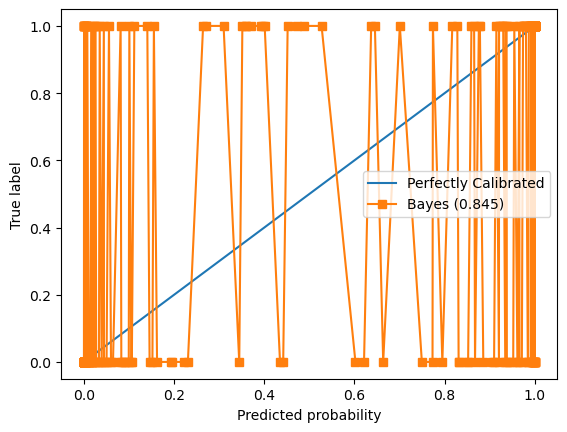

In [40]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1], [0, 1], label = 'Perfectly Calibrated')
ax1.plot(df['probability'], df['ytrue'], 's-', label = '%s (%1.3f)' %('Bayes', clf_score)) 
ax1.set_xlabel('Predicted probability')
ax1.set_ylabel('True label')
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

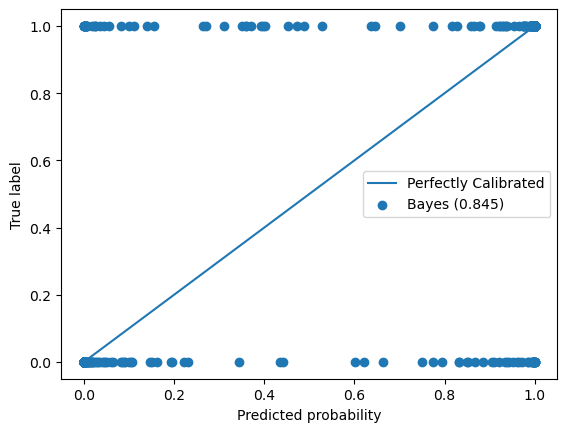

In [42]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1], [0, 1], label = 'Perfectly Calibrated')
ax1.scatter(df['probability'], df['ytrue'], label = '%s (%1.3f)' %('Bayes', clf_score)) 
ax1.set_xlabel('Predicted probability')
ax1.set_ylabel('True label')
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

可以看到，由于真实标签是0和1，所以所有的点都在y=1和y=0这两条直线上分布，这完全不是我们想要看到的。回想一下我们的可靠性曲线的横纵坐标：横坐标是预测概率，而纵坐标是真实值，我们希望预测概率很靠近真实值，那我们的真实取值必然也需要是一个概率才可以，如果使用真实标签，那我们绘制出来的图像完全是没有意义的。但是，我们去哪里寻找真实值的概率呢?这是不可能找到的--如果我们能够找到真实的概率，那我们何必还用算法来估计概率呢，直接去获取真实的概率不就好了么?所以真实概率在现实中是不可获得的。但是，我们可以获得类概率的指标来帮助我们进行校准。

一个简单的做法是，将数据进行分箱，然后规定**每个箱子中真实的少数类所占的比例**为这个箱上的**真实概率trueproba**，这个箱子中**预测概率的均值**为这个箱子的**预测概率predproba**，然后以trueproba为纵坐标，predproba为横坐标，来绘制我们的可靠性曲线。

| 参数       | 含义                                                                                                                                                                             |
| :--------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `y_true`   | 真实标签                                                                                                                                                                       |
| `y_prob`   | 预测返回的，正类别下的概率值或置信度                                                                                                                                           |
| `normalize`| 布尔值，默认`False`<br>是否将`y_prob`中输入的`内容归一化到[0,1]之间`，比如说，当`y_prob`并不是真正的概率的时候可以使用。如果这是`True`，则会将`y_prob`中最小的值归一化为0，最大值归一化为1。 |
| `n_bins`   | 整数值，表示分箱的个数。如果箱数很大，则需要更多的数据。                                                                                                                       |


| 返回      | 含义                                     |
| :-------- | :--------------------------------------- |
| `trueproba` | 可靠性曲线的纵坐标，结构为(n_bins, )，是每个箱子中少数类(Y=1)的占比 |
| `predproba` | 可靠性曲线的横坐标，结构为(n_bins, )，是每个箱子中概率的均值 |

In [35]:
from sklearn.calibration import calibration_curve

trueproba, predproba =calibration_curve(ytest, prob[:, 1]
                                        , n_bins=10)

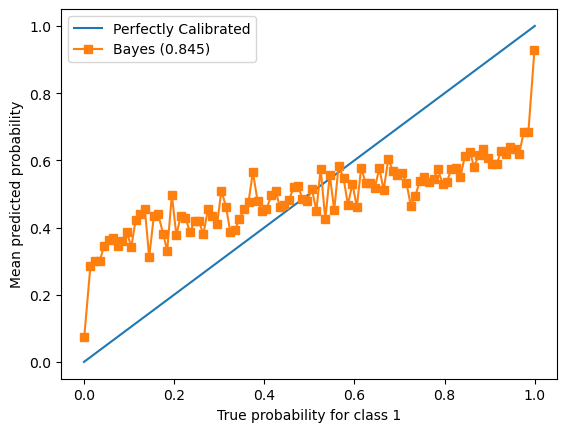

In [48]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1], [0, 1], label = 'Perfectly Calibrated')
ax1.plot( predproba, trueproba, 's-', label = '%s (%1.3f)' %('Bayes', clf_score)) 
ax1.set_xlabel('True probability for class 1')
ax1.set_ylabel('Mean predicted probability')
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

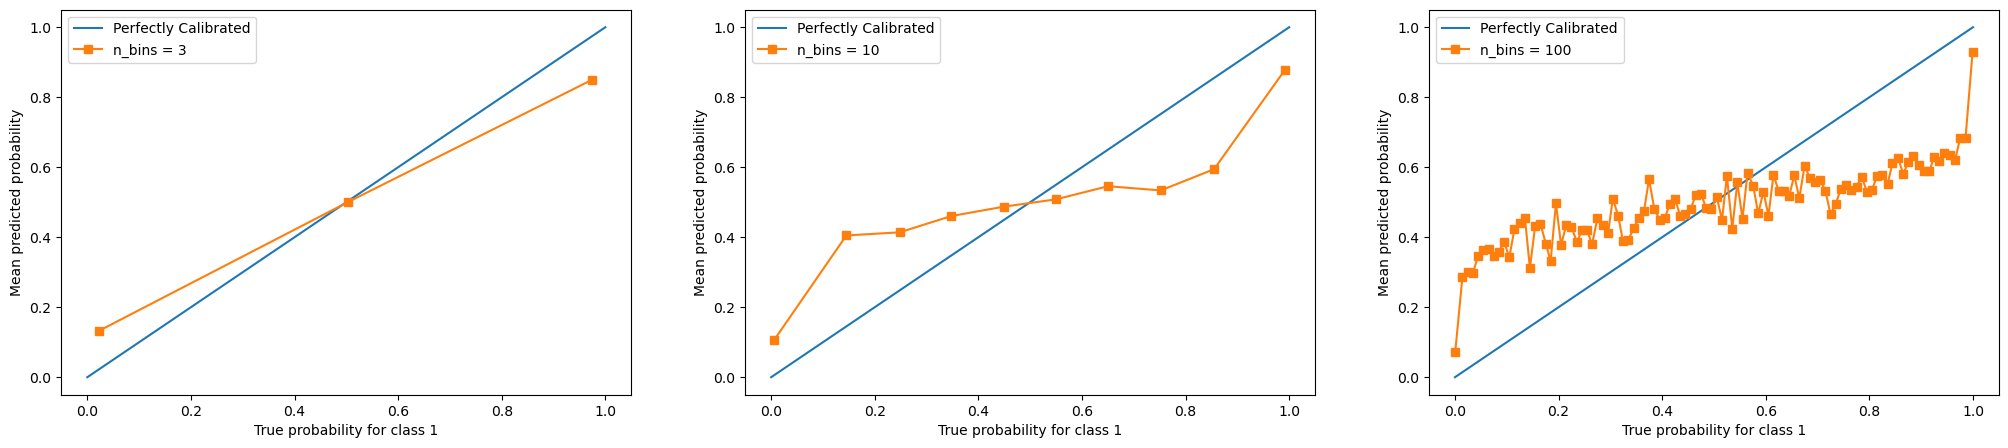

In [47]:
# 探索n_bins的影响
fig, axes = plt.subplots(1, 3, figsize = (25, 5))
for ind, i in enumerate([3, 10, 100]):
    ax = axes[ind]
    trueproba, predproba =calibration_curve(ytest, prob[:, 1], n_bins=i)
    ax.plot([0,1], [0, 1], label = 'Perfectly Calibrated')
    ax.plot( predproba, trueproba, 's-', label ='n_bins = {}'.format(i)) 
    ax.set_xlabel('True probability for class 1')
    ax.set_ylabel('Mean predicted probability')
    ax.set_ylim([-0.05, 1.05])
    ax.legend()

plt.show()


很明显可以看出，n_bins越大，箱子越多，概率校准曲线就越精确，但是太过精确的曲线不够平滑，无法和我们希望的完美概率密度曲线相比较。n bins越小，箱子越少，概率校准曲线就越粗糙，虽然靠近完美概率密度曲线，但是无法真实地展现模型概率预测地结果。因此我们需要取一个既不是太大，也不是太小的箱子个数，让概率校准曲线既不是太精确，也不是太粗糙，而是一条相对平滑，又可以反应出模型对概率预测的趋势的曲线。通常来说，建议先试试看箱子数等于10的情况。箱子的数目越大，所需要的样本量也越多，否则曲线就会太过精确。

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


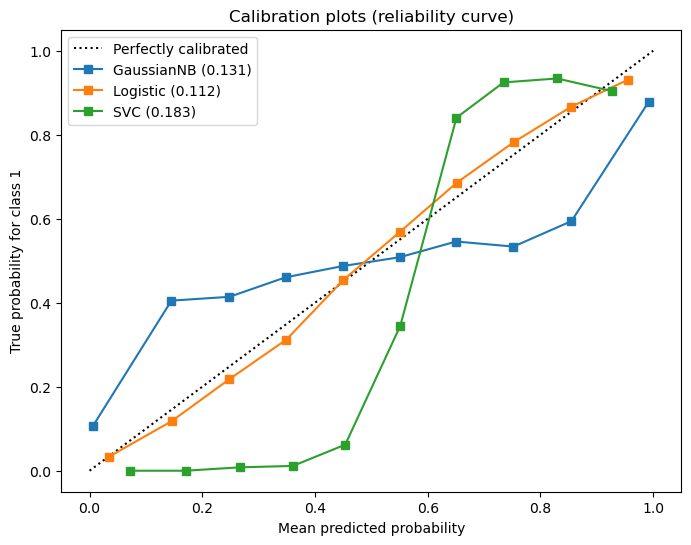

In [50]:
# 对更多的模型进行探索
name = ['GaussianNB', 'Logistic', 'SVC']

gnb = GaussianNB()
logis = LogisticRegression(solver='lbfgs', max_iter=3000, multi_class='auto')
svc = SVC(kernel='linear',gamma=1)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name_ in zip([gnb, logis, svc],name):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    #hasattr(obj,name) - 检查一个类中是否存在名为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(xtest)[:,1]
    else: # use decision function
        prob_pos = clf.decision_function(xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数
    clf_score = brier_score_loss(ytest, prob_pos, pos_label=y.max())
    trueproba, predproba = calibration_curve(ytest, prob_pos,n_bins=10)
    ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)" % (name_, clf_score))

ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predicted probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots (reliability curve)')
plt.show()

从图像的结果来看，我们可以明显看出，逻辑回归的概率估计是最接近完美的概率校准曲线，所以逻辑回归的效果最完美。相对的，高斯朴素贝叶斯和支持向量机分类器的结果都比较糟糕。支持向量机呈现类似于sigmoid函数的形状，而高斯朴素贝叶斯呈现和Sigmoid函数相反的形状。


对于贝叶斯，如果概率校准曲线呈现sigmoid函数的镜像的情况，则说明数据集中的特征**不是相互条件独立**的。贝叶斯原理中的”朴素“原则:特征相互条件独立原则被违反了(这其实是我们自己的设定，我们设定了10个冗余特征，这些特征就是噪音，他们之间不可能完全独立)，因此贝叶斯的表现不够好。


而支持向量机的概率校准曲线效果其实是典型的**置信度不足**的分类器(under-confident classifier)的表现:大量的样本点集中在决策边界的附近，因此许多样本点的置信度靠近0.5左右，即便决策边界能够将样本点判断正确，模型本身对这个结果也不是非常确信的。相对的，离决策边界很远的点的置信度就会很高，因为它很大可能性上不会被判断错误。支持向量机在面对混合度较高的数据的时候，有着天生的置信度不足的缺点。

#### 概率校准：CalibratedClassifierCV

`CalibratedClassifierCV` 是 Scikit-learn (Sklearn) 库中用于**概率校准**的一个重要工具。它是一个元估计器（meta-estimator），接受一个分类器作为输入，并为该分类器训练一个校准模型，以便其能够输出更可靠、更校准的概率预测。

**为什么需要 CalibratedClassifierCV？**

许多分类模型（例如，朴素贝叶斯、支持向量机、随机森林）虽然在分类准确率（硬分类）上表现优秀，但它们的 `predict_proba` 方法输出的概率值可能并不真正反映真实事件的发生频率，即它们**未校准（uncalibrated）**。

* **过于自信（Over-confident）**：模型预测某个样本为正类的概率很高（例如 0.9），但实际上在所有被预测为 0.9 的样本中，只有 70% 是真正的正类。
* **过于保守（Under-confident）**：模型预测某个样本为正类的概率较低（例如 0.6），但实际上在所有被预测为 0.6 的样本中，有 80% 是真正的正类。

在这种情况下，即使模型的 ROC AUC 很高，其概率输出也无法直接用于需要可信赖概率的场景，如风险评估、决策制定或与其他模型的概率融合。`CalibratedClassifierCV` 的作用就是**校准这些不准确的概率**。

**CalibratedClassifierCV 的工作原理**

`CalibratedClassifierCV` 通过在原始分类器的预测输出上应用一个**校准器**来工作。它有两种主要的校准方法：

1.  **Platt Scaling（普拉特缩放）**：
    * **方法：** 它在原始分类器的输出（例如，决策函数值或原始概率的 Logit 转换）上拟合一个**逻辑回归模型**。
    * **适用场景：** 通常对那些输出呈 S 形（Sigmoid）但两端过于平坦或过于陡峭的模型效果较好（例如，SVM、线性分类器）。

2.  **Isotonic Regression（等渗回归）**：
    * **方法：** 这是一个非参数方法，它拟合一个**非递减的分段线性函数**来映射原始输出到校准后的概率。
    * **适用场景：** 对任何形状的概率分布都可能有效，因为它不假设特定的函数形式。对于像朴素贝叶斯这样可能输出极端概率或概率分布不是 S 形的模型，等渗回归通常效果更好。

    
    * **数据需求：** 通常需要比 Platt Scaling **更多的数据**才能获得稳定的校准效果。当样本量太少（比如，小于等于1000个测试样本）的时候，不建议使用等渗回归，因为它倾向于过拟合。样本量过少的时候应该用platt校准。

**CalibratedClassifierCV 的参数**

`sklearn.calibration.CalibratedClassifierCV(estimator, *, method='sigmoid', cv='warn', n_jobs=None)`

| 参数      | 含义                                                                                                                                                                                                               |
| :-------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `estimator` | 要进行概率校准的原始分类器实例。这个分类器必须实现 `fit`、`predict_proba` (如果 `method='sigmoid'`) 或 `decision_function` (如果 `method='isotonic'` 或 `method='sigmoid'`) 方法。注意：如果基分类器是 SVC 且没有设置 `probability=True`，那么 `CalibratedClassifierCV` 会使用其 `decision_function` 的输出进行校准。如果基分类器已经输出概率，`CalibratedClassifierCV` 会直接使用这些概率进行校准。 |
| `method`  | 校准方法，可选值为 `'sigmoid'` (Platt Scaling) 或 `'isotonic'` (Isotonic Regression)。默认值为 `'sigmoid'`。                                                                                                    |
| `cv`      | 交叉验证策略。这非常重要！`CalibratedClassifierCV` 会使用交叉验证来训练校准器，以避免在同一组数据上训练分类器和校准器导致的**过拟合**。分为训练折和校准折。分类器在训练折上训练，然后在校准折上生成预测（`predict_proba` 或 `decision_function`），这些预测被用来训练校准器。推荐设置为 `5` 或 `10`，或使用 `sklearn.model_selection.KFold` 等交叉验证生成器。重要性：如果在训练分类器的数据集上直接训练校准器，校准器就会记住这些数据点，导致**过于乐观的校准**，在新的、未见过的数据上表现不佳。交叉验证解决了这个问题。 |
| `n_jobs`  | 并行运行的 CPU 核心数。如果设置为 `-1`，则使用所有可用的核心。可以加速交叉验证过程。                                                                                                                            |




In [62]:
# 校准可靠性曲线
def plot_calib(models, name, xtrain, xtest, ytrain, ytest, n_bins = 10):
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    for clf, name_ in zip(models, name):
        clf.fit(xtrain, ytrain)
        y_pred = clf.predict(xtest)
        # hasattr(obj,name): 查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(xtest)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
            # 返回布里尔分数
        clf_score = brier_score_loss(ytest, prob_pos, pos_label=ytest.max())
        trueproba, predproba = calibration_curve(ytest, prob_pos, n_bins=n_bins)
        ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_, histtype="step")

    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probability")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


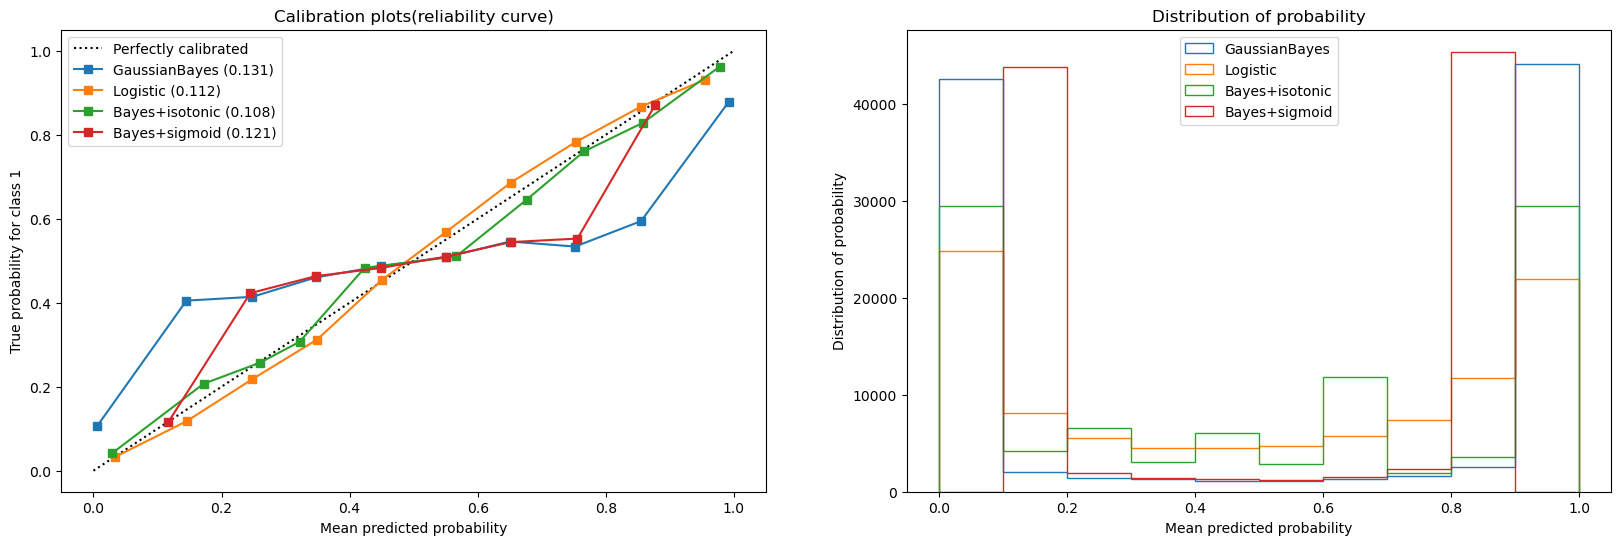

In [63]:
from sklearn.calibration import CalibratedClassifierCV

name = ["GaussianBayes", "Logistic", "Bayes+isotonic", "Bayes+sigmoid"]

gnb = GaussianNB()

models = [gnb,
          LogisticRegression(C=1., solver='lbfgs', max_iter=3000, multi_class="auto"),
          # 定义两种校准方式
          CalibratedClassifierCV(gnb, cv=2, method='isotonic'),
          CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

plot_calib(models, name, xtrain, xtest, ytrain, ytest)

从校正朴素贝叶斯的结果来看，lsotonic等渗校正大大改善了曲线的形状，几乎让贝叶斯的效果与逻辑回归持平，并且布里尔分数也下降到了0.098，比逻辑回归还低一个点。

Sigmoid校准的方式也对曲线进行了稍稍的改善，不过效果不明显。从直方图来看，Isotonic校正让高斯朴素贝叶斯的效果接近逻辑回归，而Sigmoid校正后的结果依然和原本的高斯朴素贝叶斯更相近。

可见，当数据的特征之间不是相互条件独立的时候，使用lsotonic方式来校准概率曲线，可以得到不错的结果，让模型在预测上更加“自信”。

In [65]:
# 基于校准结果查看精确性变化
gnb = GaussianNB().fit(xtrain, ytrain)
gnb.score(xtest, ytest), brier_score_loss(ytest, gnb.predict_proba(xtest)[:, 1], pos_label=1)

(0.845, 0.13131095577262628)

In [66]:
gnbisotonic = CalibratedClassifierCV(gnb, cv = 2, method='isotonic').fit(xtrain, ytrain)
gnbisotonic.score(xtest, ytest), brier_score_loss(ytest, gnbisotonic.predict_proba(xtest)[:, 1], pos_label=1)

(0.8432929292929293, 0.10774187470931658)

可以看出，校准概率后，布里尔分数明显变小了，但整体的准确率却略有下降，这证明在校准之后，尽管对概率的预测更准确了，但模型的判断力略有降低。来思考一下:布里尔分数衡量模型概率预测的准确率，布里尔分数越低，代表模型的概率越接近真实概率，当进行概率校准后，本来标签是1的样本的概率应该会更接近1，而标签本来是0的样本应该会更接近0，没有理由布里尔分数提升了，模型的判断准确率居然下降了。但从我们的结果来看，模型的准确率和概率预测的正确性并不是完全一致的，为什么会这样呢?

对于不同的概率类模型，原因是不同的。对于SVC，决策树这样的模型来说，概率不是真正的概率，而更偏向于是一个“置信度”，这些模型也不是依赖于概率预测来进行分类(决策树依赖于树权而SVC依赖于决策边界)，因此对于这些模型，可能存在着类别1下的概率为0.4但样本依然被分类为1的情况，这种情况代表着--模型很没有信心认为这个样本是1，但是还是坚持把这个样本的标签分类为1了。这种时候，概率校准可能会向着更加错误的方向调整(比如把概率为0.4的点调节得更接近0，导致模型最终判断错误)，因此出现布里尔分数可能会显示和精确性相反的趋势。

而对于朴素贝叶斯这样的模型，却是另一种情况。注意在朴素贝叶斯中，我们有各种各样的假设，除了我们的“朴素”假设，还有我们对概率分布的假设(比如说高斯)，这些假设使得我们的贝叶斯得出的概率估计其实是有偏估计，也就是说，这种概率估计其实不是那么准确和严肃。我们通过校准，让模型的预测概率更贴近于真实概率，本质是在统计学上让算法更加贴近我们对整体样本状况的估计，这样的一种校准在一组数据集上可能表现出让准确率上升，也可能表现出让准确率下降，这取决于我们的测试集有多贴近我们估计的真实样本的面貌。这一系列有偏估计使得我们在概率校准中可能出现布里尔分数和准确度的趋势相反的情况。

当然，可能还有更多更深层的原因，比如概率校准过程中的数学细节如何影响了我们的校准，类calibration_curve中是如何分箱，如何通过真实标签和预测值来生成校准曲线使用的横纵坐标的，这些过程中也可能有着让布里尔分数和准确率向两个方向移动的过程。

在现实中，当两者相悖的时候，请务必以**准确率为标准**。但是这不代表说布里尔分数和概率校准曲线就无效了。概率类模型几乎没有参数可以调整，除了换模型之外，鲜有更好的方式帮助我们提升模型的表现，概率校准是难得的可以帮助我们针对概率提升模型的方法。

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


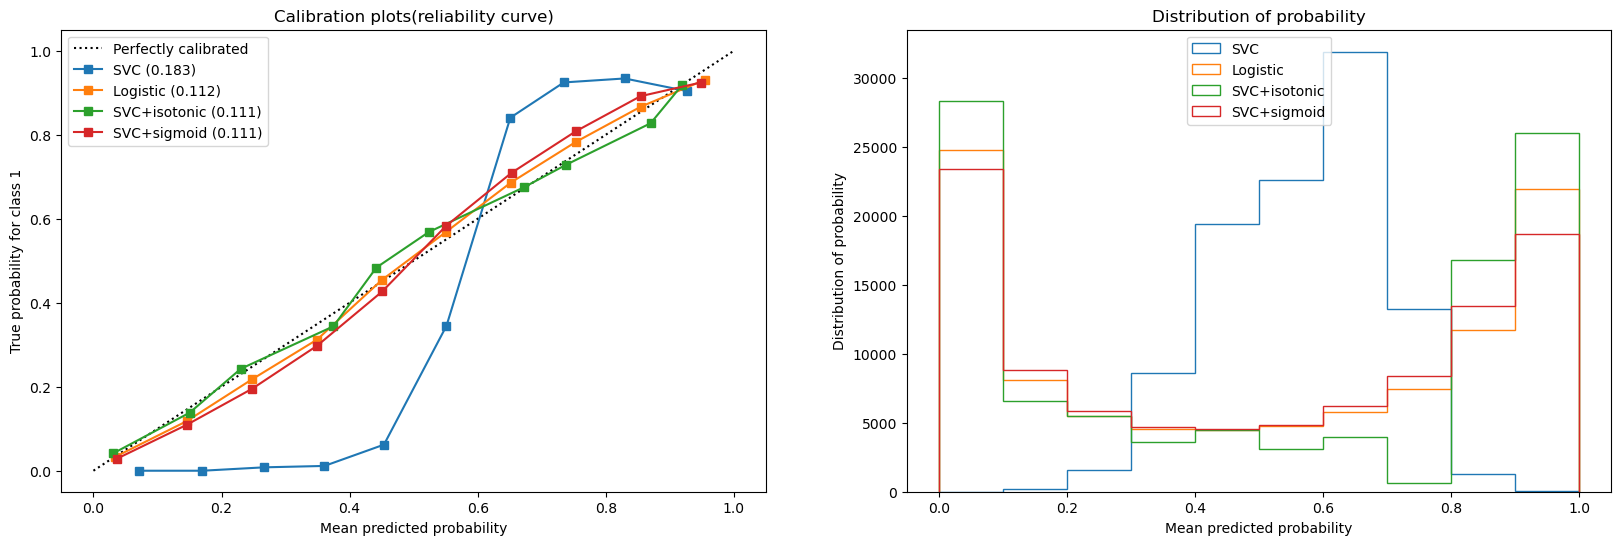

In [68]:
name_svc = ["SVC", "Logistic", "SVC+isotonic", "SVC+sigmoid"]

svc = SVC(kernel="linear", gamma=1)

models_svc = [svc,
              LogisticRegression(C=1., solver='lbfgs', max_iter=3000, multi_class="auto"),
              # 依然定义两种校准方式
              CalibratedClassifierCV(svc, cv=2, method='isotonic'),
              CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

plot_calib(models_svc, name_svc, xtrain, xtest, ytrain, ytest)

可以看出，对于SVC，sigmoid和isotonic的校准效果都非常不错，无论是从校准曲线来看还是从概率分布图来看，两种校准都让SVC的结果接近逻辑回归，其中sigmoid更加有效。来看看不同的SVC下的精确度结果:

In [69]:
for clf, name in zip(models_svc, name_svc):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(ytest, prob_pos, pos_label=ytest.max())
    score = clf.score(xtest, ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1828
	Accuracy:0.8537
Logistic:
	Brier:0.1119
	Accuracy:0.8489


d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVC+isotonic:
	Brier:0.1108
	Accuracy:0.8518
SVC+sigmoid:
	Brier:0.1111
	Accuracy:0.8541


### Histogram

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


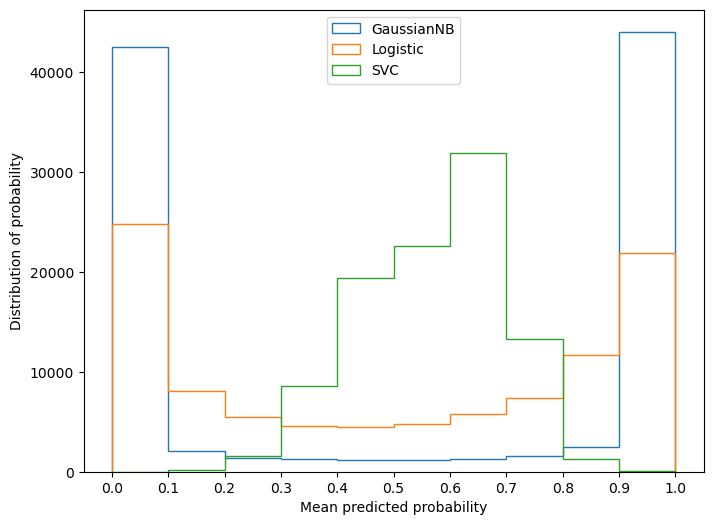

In [56]:

'''我们可以通过绘制直方图来查看模型的预测概率的分布。
直方图时以样本的预测概率分箱后的结果为横坐标，每个箱中的样本数量为纵坐标的一个图像。
注意，这里的分箱和我们在可靠性曲线中的分箱不同，
这里的分箱是将预测概率均匀分为一个个的区间，与之前可靠性曲线中为了平滑的分箱完全是两码事。
我们来绘制一下我们的直方图:
'''
fig, ax2 = plt.subplots(figsize=(8,6))

for clf, name_ in zip([gnb, logis, svc],name):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    #hasattr(obj,name): 检查一个类中是否存在名为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(xtest)[:,1]
    else: # use decision function
        prob_pos = clf.decision_function(xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos
             ,bins=10
             ,label=name_
             ,histtype="step" #设置直方图为透明
            #  ,lw=10 #设置直方图每个柱子的粗细
            )
    
ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

可以看到，高斯贝叶斯的概率分布是两边非常高，中间非常低，几乎90%以上的样本都在0和1附近，可以说是置信度最高的算法，但是贝叶斯的布里尔分数却不如逻辑回归，这证明贝叶斯中在0和1附近的样本中有一部分是被分错的。

支持向量贝叶斯完全相反，明显是中间高，两边低，类似于正态分布的状况，证明了我们刚才所说的，大部分样本都在决策边界附近，置信度都徘徊在0.5左右的情况。

而逻辑回归位于高斯朴素贝叶斯和支持向量机的中间，即没有太多的样本过度靠近0和1，也没有形成像支持向量机那样的正态分布。一个比较健康的正样本的概率分布，就是逻辑回归的直方图显示出来的样子。


避免混淆:概率密度曲线和概率分布直方图
大家也许还记得我们说过，我们是假设样本的概率分布为高斯分布，然后使用高斯的方程来估计连续型变量的概率。怎么现在我们绘制出的概率分布结果中，高斯普斯贝叶斯的概率分布反而完全不是高斯分布了呢?

注意，千万不要把概率密度曲线和概率分布直方图混淆概率分布直方图，横坐标是概率的取值[0,1]，纵坐标是落在这个概率取值范围中的样本的个数，衡量的是每个概率取值区间之内有多少样本。这个分布，是没有任何假设的。

# 贝叶斯做文本分类

### 文本编码

将文本编码成数字。一般常用方法是单词计数或向量计数

In [89]:
# 一种方法
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

In [17]:
sample = ['Machine learning is fascinating, it is wonderful'
          , 'Machine learning is a sensational technology'
          , 'Elsa is a popular character']

x = vec.fit_transform(sample)
vec.get_feature_names_out()

array(['character', 'elsa', 'fascinating', 'is', 'it', 'learning',
       'machine', 'popular', 'sensational', 'technology', 'wonderful'],
      dtype=object)

In [18]:
import pandas as pd
cvresult = pd.DataFrame(x.toarray(), columns=vec.get_feature_names_out())
cvresult

character  elsa  fascinating  is  it  learning  machine  popular  \
0          0     0            1   2   1         1        1        0   
1          0     0            0   1   0         1        1        0   
2          1     1            0   1   0         0        0        1   

   sensational  technology  wonderful  
0            0           0          1  
1            1           1          0  
2            0           0          0

In [ ]:
# 为了防止句子特别长的样本对参数的贡献过大，我们用ComplementNB每个特征的权重除L2范式

In [ ]:
# 一种方法
# TF-IDF
# 压制频繁出现的词的权重
from sklearn.feature_extraction.text import TfidfVectorizer as TF 
x = TF().fit_transform(sample)
x

<3x11 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [20]:
tfresult = pd.DataFrame(x.toarray(), columns=TF().fit(sample).get_feature_names_out())
tfresult

character      elsa  fascinating        is        it  learning   machine  \
0   0.000000  0.000000     0.424396  0.501310  0.424396  0.322764  0.322764   
1   0.000000  0.000000     0.000000  0.315444  0.000000  0.406192  0.406192   
2   0.546454  0.546454     0.000000  0.322745  0.000000  0.000000  0.000000   

    popular  sensational  technology  wonderful  
0  0.000000     0.000000    0.000000   0.424396  
1  0.000000     0.534093    0.534093   0.000000  
2  0.546454     0.000000    0.000000   0.000000

In [21]:
cvresult.sum(axis = 0)

character      1
elsa           1
fascinating    1
is             4
it             1
learning       2
machine        2
popular        1
sensational    1
technology     1
wonderful      1
dtype: int64

In [23]:
cvresult.sum(axis = 0).sum()

16

In [25]:
cvresult.sum(axis = 0)/cvresult.sum(axis = 0).sum()

character      0.0625
elsa           0.0625
fascinating    0.0625
is             0.2500
it             0.0625
learning       0.1250
machine        0.1250
popular        0.0625
sensational    0.0625
technology     0.0625
wonderful      0.0625
dtype: float64

In [26]:
tfresult.sum(axis = 0)/tfresult.sum(axis = 0).sum()

character      0.083071
elsa           0.083071
fascinating    0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
technology     0.081192
wonderful      0.064516
dtype: float64

### 探索文本数据

In [32]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

In [28]:
data = fetch_20newsgroups()

In [30]:
data.target

array([7, 4, 4, ..., 3, 1, 8])

In [36]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [33]:
np.unique(data.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [34]:
data.data

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [81]:
# 只想提取以下四类
categories = ['sci.space'
              , 'rec.sport.hockey'
              , 'talk.politics.guns'
              , 'talk.politics.mideast']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [38]:
train

{'data': ["From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)\nSubject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)\nNntp-Posting-Host: vipunen.hut.fi\nOrganization: Helsinki University of Technology, Finland\nLines: 51\n\nIn <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:\n\n>: FINLAND:  \n>: \n>: D-Jyrki Lumme.......20\n>: D-Teppo Numminen....20\n>: D-Peter Ahola.......13\n>: \n>Well well, they don't like our defenders (mainly Lumme and Numminen)...\n\nAbout 25 is correct for Numminen and Lumme.\n\n\n>: R-Teemu Selanne.....27\n>: \n>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.\n\nNo, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.\n\n>: well in the Canada Cup and World Championships largely due to the efforts of\n>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's\n>: presumably a lot of decent players in Finland that wouldn't be superstars at\n>: t

In [82]:
train.target_names

['rec.sport.hockey',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast']

In [83]:
len(train.data)

2303

In [84]:
print(train.data[666])

From: slegge@kean.ucs.mun.ca
Subject: Re: NHL Team Captains
Lines: 12
Organization: Memorial University. St.John's Nfld, Canada

NJ> : >And, while we are on the subject, has a captain ever been 
traded,  
NJ> : >resigned, or been striped of his title during the season? Any 
other 
NJ> : >team captain trivia would be appreciated.    
 
Mike Foligno was captain of the Buffalo Sabres when he was traded to
Toronto.
 
Stephen Legge
SLEGGE@kean.ucs.mun.ca
\



In [43]:
np.unique(train.target)

array([0, 1, 2, 3], dtype=int64)

In [47]:
for i in [0, 1, 2, 3]:
    print(i, (train.target == i).sum()/len(train.target))

# 完全没有样本不均衡问题

0 0.26052974381241856
1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


### 使用TF将文本数据编码

In [90]:
xtrain = train.data
ytrain = train.target
xtest = test.data
ytest = test.target

In [91]:
tf = TF().fit(xtrain)
xtrain_ = tf.transform(xtrain)
xtest_ = tf.transform(xtest)

In [92]:
df = pd.DataFrame(xtrain_.toarray(), columns=tf.get_feature_names_out())
df.head() 

00       000  0000  00000  000000  000021  000062david42  000152  000246  \
0  0.0  0.000000   0.0    0.0     0.0     0.0            0.0     0.0     0.0   
1  0.0  0.000000   0.0    0.0     0.0     0.0            0.0     0.0     0.0   
2  0.0  0.058046   0.0    0.0     0.0     0.0            0.0     0.0     0.0   
3  0.0  0.000000   0.0    0.0     0.0     0.0            0.0     0.0     0.0   
4  0.0  0.000000   0.0    0.0     0.0     0.0            0.0     0.0     0.0   

   000256  ...  zwrm   zx  zx6wre  zxp  zxqi   zy  zyg   zz  zz_g9q3  zzzzzz  
0     0.0  ...   0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0      0.0     0.0  
1     0.0  ...   0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0      0.0     0.0  
2     0.0  ...   0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0      0.0     0.0  
3     0.0  ...   0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0      0.0     0.0  
4     0.0  ...   0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0      0.0     0.0  

[5 rows x 40725 columns]

In [93]:
df.shape

(2303, 40725)

### 使用NB建模查看结果

In [94]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.metrics import brier_score_loss
name = ['Multinomial', 'Complement', 'Bernoullli']
# 注意GaussianNB不接受稀疏矩阵
models = [MultinomialNB(), ComplementNB(), BernoulliNB()]
for name, clf in zip(name, models):
    clf.fit(xtrain_, ytrain)
    y_pred = clf.predict(xtest_)
    prob = clf.predict_proba(xtest_)
    score = clf.score(xtest_, ytest)
    print(name)

    birer = []
    for i in range(len(np.unique(ytrain))):
        bs = brier_score_loss((ytest == i).astype(int), prob[:, i], pos_label=1)
        birer.append(bs)
        print('\tbirer under {}:{:.5f}'.format(train.target_names[i], bs))

    print('\tmeanbirer:{:.5f}'.format(np.mean(birer)))
    print('\tAccuracy:{:.5f}'.format(score))
    print('\n')
    

Multinomial
	birer under rec.sport.hockey:0.01771
	birer under sci.space:0.03331
	birer under talk.politics.guns:0.03028
	birer under talk.politics.mideast:0.02556
	meanbirer:0.02672
	Accuracy:0.97521


Complement
	birer under rec.sport.hockey:0.02305
	birer under sci.space:0.03854
	birer under talk.politics.guns:0.03862
	birer under talk.politics.mideast:0.03280
	meanbirer:0.03325
	Accuracy:0.98565


Bernoullli
	birer under rec.sport.hockey:0.06837
	birer under sci.space:0.02550
	birer under talk.politics.guns:0.04451
	birer under talk.politics.mideast:0.05258
	meanbirer:0.04774
	Accuracy:0.90150




In [95]:
# 概率校准
from sklearn.calibration import CalibratedClassifierCV

name = ["Multinomial",
        "Multinomial + Isotonic",
        "Multinomial + Sigmoid",
        "Complement",
        "Complement + Isotonic",
        "Complement + Sigmoid",
        "Bernoulli",
        "Bernoulli + Isotonic",
        "Bernoulli + Sigmoid"]

models = [MultinomialNB(),
          CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic'),
          CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid'),
          ComplementNB(),
          CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic'),
          CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid'),
          BernoulliNB(),
          CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic'),
          CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
         ]

In [96]:
for name, clf in zip(name, models):
    clf.fit(xtrain_, ytrain)
    y_pred = clf.predict(xtest_)
    prob = clf.predict_proba(xtest_)
    score = clf.score(xtest_, ytest)
    print(name)

    birer = []
    for i in range(len(np.unique(ytrain))):
        bs = brier_score_loss((ytest == i).astype(int), prob[:, i], pos_label=1)
        birer.append(bs)
        print('\tbirer under {}:{:.5f}'.format(train.target_names[i], bs))

    print('\tmeanbirer:{:.5f}'.format(np.mean(birer)))
    print('\tAccuracy:{:.5f}'.format(score))
    print('\n')
    

Multinomial
	birer under rec.sport.hockey:0.01771
	birer under sci.space:0.03331
	birer under talk.politics.guns:0.03028
	birer under talk.politics.mideast:0.02556
	meanbirer:0.02672
	Accuracy:0.97521


Multinomial + Isotonic
	birer under rec.sport.hockey:0.00558
	birer under sci.space:0.01163
	birer under talk.politics.guns:0.01291
	birer under talk.politics.mideast:0.00939
	meanbirer:0.00988
	Accuracy:0.97326


Multinomial + Sigmoid
	birer under rec.sport.hockey:0.00555
	birer under sci.space:0.01181
	birer under talk.politics.guns:0.01313
	birer under talk.politics.mideast:0.00930
	meanbirer:0.00995
	Accuracy:0.97326


Complement
	birer under rec.sport.hockey:0.02305
	birer under sci.space:0.03854
	birer under talk.politics.guns:0.03862
	birer under talk.politics.mideast:0.03280
	meanbirer:0.03325
	Accuracy:0.98565


Complement + Isotonic
	birer under rec.sport.hockey:0.00394
	birer under sci.space:0.00738
	birer under talk.politics.guns:0.00879
	birer under talk.politics.mideast:0.

可以观察到，多项式分布下无论如何调整，算法的效果都不如补集朴素贝叶斯来得好。因此我们在分类的时候，应该选择补集朴素贝叶斯。对于补集朴素贝叶斯来说，使用Sigmoid进行概率校准的模型综合最优秀：准确率最高，对数损失和布里尔分数都在0.1以下，可以说是非常理想的模型了。